<a href="https://colab.research.google.com/github/PrachiSinghal86/Introduction-to-Pytorch/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import helper
import matplotlib.pyplot as ply
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])
#load trainset
trainset=datasets.FashionMNIST('Fashion-MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
#load test set
testset=datasets.FashionMNIST('Fashion-MNIST_data/',download=True,train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

0it [00:00, ?it/s]

26427392it [00:02, 10597082.25it/s]                             


Extracting Fashion-MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 66492.28it/s]                            
0it [00:00, ?it/s]

Extracting Fashion-MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw


4423680it [00:01, 2982884.22it/s]                            
0it [00:00, ?it/s]

Extracting Fashion-MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw


8192it [00:00, 23548.57it/s]            

Extracting Fashion-MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Fashion-MNIST_data/FashionMNIST/raw
Processing...
Done!


In [9]:
from torch import nn
import torch.nn.functional as F

images, labels = next(iter(trainloader))  
images = images.view(images.shape[0], -1)
print(images.shape)
model =nn.Sequential(nn.Linear(784,256),nn.Dropout(p=0.2),
                     nn.ReLU(),nn.Linear(256,128),
                     nn.Dropout(p=0.2),nn.ReLU(),nn.Linear(128,64),
                     
                     nn.Dropout(p=0.2),nn.ReLU(),nn.Linear(64,10),nn.LogSoftmax(dim=1))
crite=nn.NLLLoss()    #Loss Function
logits=model(images)
loss=crite(logits,labels)
print(loss)


torch.Size([64, 784])
tensor(2.3011, grad_fn=<NllLossBackward>)


In [10]:
from torch import optim

epoch=5
optimizer=optim.SGD(model.parameters(),lr=0.02)
for i in range(epoch):
  runlos=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)   #flatten the images
    optimizer.zero_grad()
    output=model.forward(images)
    loss=crite(output,labels)
    loss.backward()
    optimizer.step()
    runlos+=loss.item()
  else:
    print(f"Training Loss:{runlos/len(trainloader)}")



Training Loss:1.1498377749851263
Training Loss:0.6199535522252512
Training Loss:0.5267186020769036
Training Loss:0.4777222848904412
Training Loss:0.44652926604122495


In [0]:
from torch.autograd import Variable
import matplotlib.pyplot as plt

def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

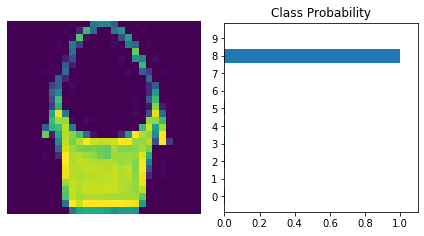

In [0]:
%matplotlib inline

import helper
images,labels=next(iter(trainloader))
img=images[10].view(1,784)
with torch.no_grad():
  logits=model.forward(img)
p=F.softmax(logits,dim=1)
view_classify(img.view(1,28,28),p)

In [15]:
#validation Solution
from torch import optim
test_losses,train_losses=[],[]
epoch=16
optimizer=optim.SGD(model.parameters(),lr=0.02)
for i in range(epoch):
  runlos=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)   #flatten the images
    optimizer.zero_grad()
    output=model.forward(images)
    loss=crite(output,labels)
    loss.backward()
    optimizer.step()
    runlos+=loss.item()
  else:
    testloss=0
    acc=0
    with torch.no_grad():
      model.eval()
      for images,labels in trainloader:
        images=images.view(images.shape[0],-1) 
        logps=model(images)
        testloss+=crite(logps,labels)
        ps=torch.exp(logps)
        topp,topclass=ps.topk(1,dim=1)
        equals= topclass==labels.view(*topclass.shape)
        acc+=torch.mean(equals.type(torch.FloatTensor))
    model.train()
    train_losses.append(runlos/len(trainloader))
    test_losses.append(testloss/len(testloader))
    print(f"Training Loss:{runlos/len(trainloader)}")
    print(f"Test Loss:{testloss/len(testloader)}")
    print(acc/len(testloader))

Training Loss:0.3334325422753276
Test Loss:1.6840417385101318
tensor(5.3679)
Training Loss:0.3254215296969485
Test Loss:1.6381117105484009
tensor(5.3848)
Training Loss:0.31995065949523627
Test Loss:1.6222823858261108
tensor(5.3898)
Training Loss:0.31519495141404524
Test Loss:1.604566216468811
tensor(5.3928)
Training Loss:0.3065772110830619
Test Loss:1.5383957624435425
tensor(5.4189)
Training Loss:0.30139132217367065
Test Loss:1.5079537630081177
tensor(5.4311)
Training Loss:0.29541602683887047
Test Loss:1.5504077672958374
tensor(5.4095)
Training Loss:0.2917308509032101
Test Loss:1.5741287469863892
tensor(5.3987)
Training Loss:0.286513160167536
Test Loss:1.4322785139083862
tensor(5.4561)
Training Loss:0.2819050145603573
Test Loss:1.3890082836151123
tensor(5.4735)
Training Loss:0.2769847716381555
Test Loss:1.3909443616867065
tensor(5.4709)
Training Loss:0.27284096449470596
Test Loss:1.3576874732971191
tensor(5.4674)
Training Loss:0.26744238194673936
Test Loss:1.4442036151885986
tensor(5.4

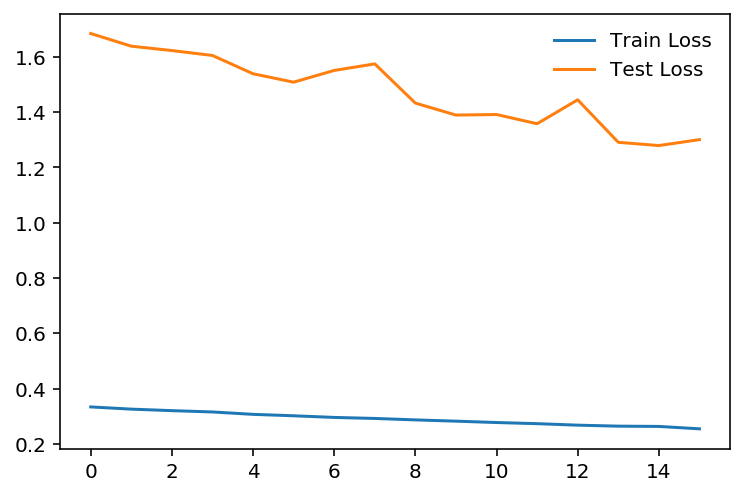

In [16]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.plot(train_losses,label='Train Loss')
plt.plot(test_losses,label='Test Loss')
plt.legend(frameon=False)